# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2020/2021
## Assignment #6 - Bayesian Inference & Hypothesis Testing

***
### Group: C
### Names of members: 

1. Aida Usmanova
2. Emilio Brambilla
3. Navneet Singh Arora

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://python3.guide/), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=582), especially L10 & L11. **Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, 2 February 2021, 19:59 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, 10 February 2021, 12:00 - 13:30 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A06_Group_A.ipynb 
2. RM_A06_Group_A.pdf

***
***

#### Task 1 **[40 points] Bayes Parameter Estimation** 

Please answer each of the following three questions with step-by-step calculations and explanations, using python code and suitable plots. 
1. Suppose you are a biologist studying a pair of recently discovered species. In your area, 4% of individuals belong to species A and 96% of individuals belong to species B. There is currently no genetic test that is able to distinguish between them. However, they differ in frequency of a rare color pattern. In fact, species A exhibits the rare color pattern in 40% of the cases, while for species B this pattern is found in only 2% of the cases. Assume that these percentages are known with certainty from many years of field research. Now, suppose you find an individual with the rare color pattern. Use Bayes Theorem to calculate the probability that this individual belongs to species A.
2. Let's assume that after graduating from (high) school, 3% of the graduates will study computer science. From numerous surveys, it is commonly known that among all computer science students, 30% play video and computer games for more than three hours per day on average. In contrast, only 6% of students from other disciplines do just that. You are walking across the campus of the University of Hamburg and ask the first student you encounter about the average amount of hours this student spends gaming every day and you receive "four" as an answer. What is the probability that this student is studying computer science? What is the probability that he/she is taking a different course of study?
3. You are playing a heated game of Dungeons & Dragons, and the Dungeon Master's (DM) main character always attacks you with two weapons (one dice for each).You would like to know what kind of weapons these are, and you could easily find out if you knew the individual damage rolls, but the DM will only tell you the total sum of both dices. You know that each weapon must be either a d6, d8, d10 or d12 (dX = X-sided dice) and there is no duplicate weapon. You make the hypothesis that the DM is in possession of d6 and d10. What is the probability for this hypothesis, considering that the DM's last five attacks had a total damage of [11, 8, 5, 14, 5]?

In [1]:
# Importing Python Libraries for further computation

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import requests
import io
import datetime
from plotly import tools, subplots
from plotly import tools, subplots
import seaborn as sns

### Question 1

Suppose you are a biologist studying a pair of recently discovered species. In your area, 4% of individuals belong to species A and 96% of individuals belong to species B. There is currently no genetic test that is able to distinguish between them. However, they differ in frequency of a rare color pattern. In fact, species A exhibits the rare color pattern in 40% of the cases, while for species B this pattern is found in only 2% of the cases. Assume that these percentages are known with certainty from many years of field research. Now, suppose you find an individual with the rare color pattern. Use Bayes Theorem to calculate the probability that this individual belongs to species A.

### Answer 1.1

Before calculations, we summarize the data as below: 

| Species      | Value | Description     |
| :---        |    :----:   |          :--- |
| Species A      | 04%       | Probability of an individual belonging to species A   |
| Species B   | 96%        | Probability of an individual belonging to species B      |
| Total Species   | 100%        | -      |
| Species A's Rare Pattern   | 40%        | Probablity of an individual having rare color patter given that individual belongs to species A      |
| Species B's Rare Pattern   | 02%        | Probablity of an individual having rare color patter given that individual belongs to species B      |
| Total Rare Pattern Species   | 42%        | -      |

A = {Species A}  
B = {Species B}  
H = {Having rare color pattern}  

> $\rightarrow$ p(A) = 0.04  
> $\rightarrow$ p(B) = 0.96  
> $\rightarrow$ p(H|A) = 0.4  
> $\rightarrow$ p(H|B) = 0.02  

We have to find p(A|H) : Probability of creature belonging to species A given that individual has rare color pattern. We will calculate using following formula:  

> $\rightarrow$ p(A|H) = (p(A) * p(H|A))/p(H)

In order to do that, firstly we have to calculate p(H) : Probability of having rare color pattern.   

> $\rightarrow$ p(H) = p(A) * p(H|A) + p(B) * p(H|B)

In [21]:
p_A = 0.04
p_B = 0.96
p_H_A = 0.4
p_H_B = 0.02

p_H = p_A*p_H_A + p_B*p_H_B
p_A_H = (p_A*p_H_A)/p_H

In [22]:
print("Probability of having rare color pattern: ", p_H)
print("Probability of creature belonging to species A given that individual has rare color pattern: ", p_A_H)

Probability of having rare color pattern:  0.035199999999999995
Probability of creature belonging to species A given that individual has rare color pattern:  0.45454545454545464


**RESULT**  

So as per our calculations, 
- There is 45% probablility that the individual found with a rare color pattern belongs to Species A.

### Question 1.2
Let's assume that after graduating from (high) school, 3% of the graduates will study computer science. From numerous surveys, it is commonly known that among all computer science students, 30% play video and computer games for more than three hours per day on average. In contrast, only 6% of students from other disciplines do just that. You are walking across the campus of the University of Hamburg and ask the first student you encounter about the average amount of hours this student spends gaming every day and you receive "four" as an answer. What is the probability that this student is studying computer science? What is the probability that he/she is taking a different course of study?

### Answer 1.2

Before calculations, we summarize the data as below: 

| Data      | Student's Ratio | Description     |
| :---        |    :----:   |          :--- |
| Computer Science Student     | 03%       | Probability of meeting Computer Science student   |
| Other Students   | 97%        | Probability omeeting non Computer Science student      |
| Total Students   | 100%        | -      |
| Computer Science Student playing Video Games (> 3 hours)   | 30%        | Probablity of a student playing games given that he is Computer Science student      |
| Other Students playing Video Games (> 3 hours)   | 06%        | Probablity of a student playing games given that he is not Computer Science student      |
| Total Students playing Video Games (> 3 hours)   | 36%        | -      |



A = {Computer Science student}  
B = {Non Computer Science student}  
H = {Playing video and computer games}  

> $\rightarrow$ p(A) = 0.03  
> $\rightarrow$ p(B) = 0.97  
> $\rightarrow$ p(H|A) = 0.3  
> $\rightarrow$ p(H|A) = 0.06  

We have to find p(A|H) : Probability of meeting Computer Science student given that met person plays games. We will calculate using following formula:

> $\rightarrow$ p(A|H) = (p(A) * p(H|A))/p(H)

But, firstly we have to calculate p(H) : Probability of playing games. 

> $\rightarrow$ p(H) = p(A) * p(H|A) + p(B) * p(H|B)

In [59]:
p_A = 0.03
p_B = 0.97
p_H_A = 0.3
p_H_B = 0.06

p_H = p_A*p_H_A + p_B*p_H_B
p_A_H = (p_A*p_H_A)/p_H
p_B_H = (p_A*p_H_B)/p_H

In [60]:
print("Probability of playing video and computer games: ", p_H)
print("Probability of meeting Computer Science student playing video and computer games: ", p_A_H)
print("Probability of meeting student from Other subject playing video and computer games: ", p_B_H)

Probability of playing video and computer games:  0.0672
Probability of meeting Computer Science student playing video and computer games:  0.13392857142857142
Probability of meeting student from Other subject playing video and computer games:  0.026785714285714288


**RESULT**  

So as per our calculations, 
- There is 13.39% probablility that the student met studies Computer Science
- There is 2.67% probablility that the student met studies subject other than Computer Science

### Question 1.3
You are playing a heated game of Dungeons & Dragons, and the Dungeon Master's (DM) main character always attacks you with two weapons (one dice for each).You would like to know what kind of weapons these are, and you could easily find out if you knew the individual damage rolls, but the DM will only tell you the total sum of both dices. You know that each weapon must be either a d6, d8, d10 or d12 (dX = X-sided dice) and there is no duplicate weapon. You make the hypothesis that the DM is in possession of d6 and d10. What is the probability for this hypothesis, considering that the DM's last five attacks had a total damage of [11, 8, 5, 14, 5]?

### Answer 1.3
We have 4 dices, therefore there exist 6 variants of dice combinations.

(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)

Which means we have 6 hypotheses and In the beginning each combination has eqal chance, hence all priors are equal to 1/6.


In [6]:
def calculate_likelihood(attack_damage, combination):
    success_num = 0
    die_1 = combination[0]
    die_2 = combination[1]
    for i in range(1, die_1 + 1):
        for j in range(1, die_2 + 1):
            if i + j == attack_damage:
                success_num += 1 
    return success_num/(die_1*die_2)

In [7]:
def calculate_normalized_constnat(attack_damage, combinations, priors):
    norm = 0
    for combination, prior in zip(combinations, priors):
        norm += calculate_likelihood(attack_damage, combination)*prior
    return norm

In [8]:
def calculate_posterior(prior, likelihood, normalized_constant):
    return (prior*likelihood)/normalized_constant

In [62]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
print(posteriors)

[0.19422638802389536, 0.28639846272451525, 0.19182853138162506, 0.17620217921527792, 0.09913638555386328, 0.05220805310082308]


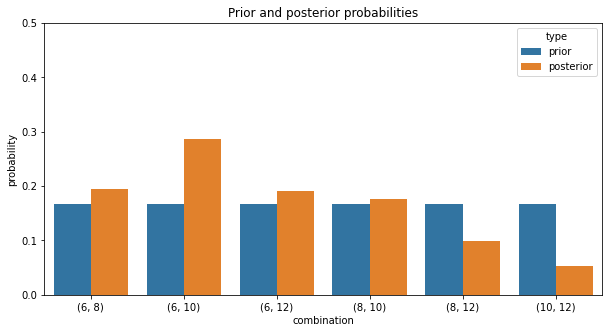

In [63]:
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
plt.figure(figsize=(10,5))
plt.ylim(0,0.5)
plt.title('Prior and posterior probabilities')
sns.barplot(x='combination', hue='type', y='probability', data=data)
plt.show()

#### Task 2 **[60 points] Savage-Dickey Method**

Returning to the Dungeons & Dragons scenario from task 1.3, our goal is now to test and evaluate our hypothesis of the DM using a combination of the two dices d6 and d10.
1. Name one uninformed and one informed prior you would pick for the upcoming hypothesis test and motivate your decision.
2. Perform a test on the given d6/d10 hypothesis following the Savage-Dickey method and using the **uninformed prior** that you previously chose. Show your calculation steps in python as well as the resulting Bayes Factor.
3. Repeat the test, but this time using the **informed prior**. Show again intermediate steps and the resulting Bayes Factor.
4. Analyze both test outcomes from subtasks 2. and 3. and compare them. Explain how to interpret the Bayes Factor and give reasons for potential discrepancies between different kinds of priors.
5. Given your test results, would you assume a different dice combination and why? Support your reasoning with a suitable diagram.

### Answer 2.1
**Uninformed**: We don't know which dice the DM picks, therefore each dice combonation has equal chances.

**Informed**: DM likes to pick certain dice combinations (d8 and d10).
Assuming that dice options available are d6, d8, d10, d12, however in original game there are 6 type of dices available.

**Motivation**: The task of a DM is to make a fun and interesting game by setting up the target number and providing good strories. If the player's attack is equal or exceeds the target number then the player has slayed the monster, otherwaise he fails the mission. So if DM sets a very high target number then the game will end very quickly and nobody will have fun, same works vice versa if the target number is low, in that case all players can fight monster easily. 

 By picking d12 there is a high risk to set very high target number and with d6 the target number could be low. That is why we assume that the DM would prefer d8 and d10 dice combination which are the two dices exactly in the middle.

### Answer 2.2
An uniformed prior means that all priors are uniformly dirstibuted. In answer 1.3 we had the same case, where all priors where equal.

According to Savage-Dickey method we can calculate Bayes factor by dividing the height of the posterior by the height of the prior.

We assume that our theta is the (d6,d10) dice combination. For this combination we know prior and posteriors, 0.167 and 0.286 respectively.

In [35]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.7183907763470916


The Bayes factor is 1.71, which is a weak evidance in favor of H0.

### Question 2.3
Repeat the test, but this time using the informed prior. Show again intermediate steps and the resulting Bayes Factor.

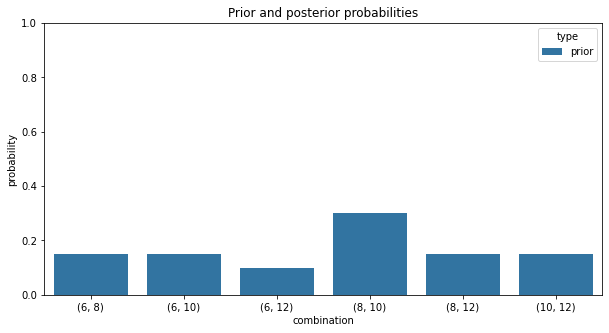

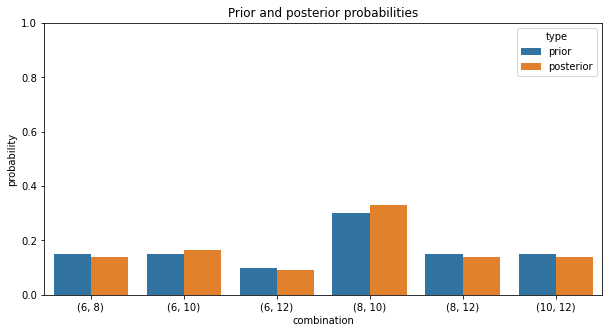

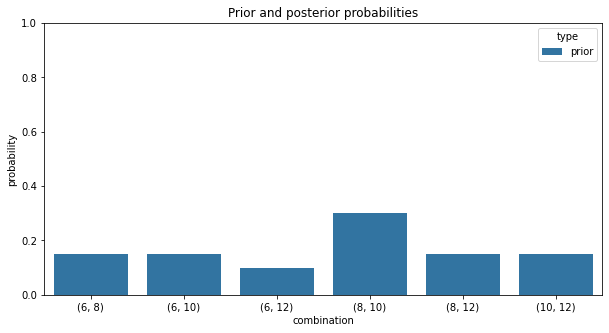

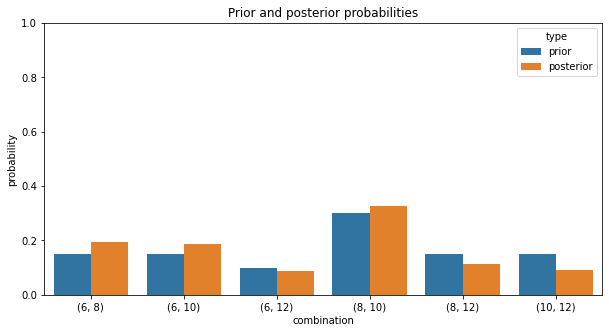

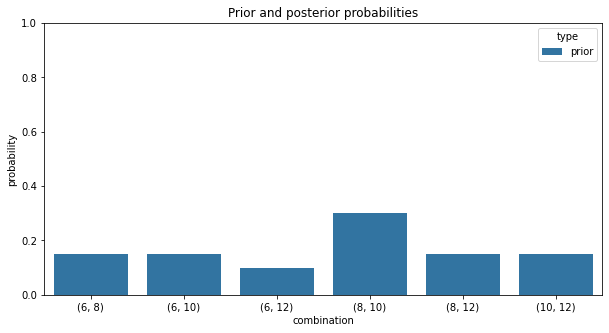

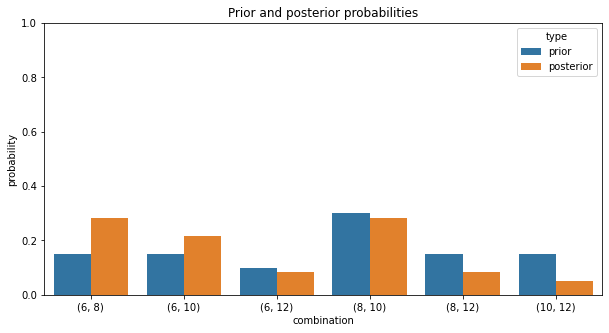

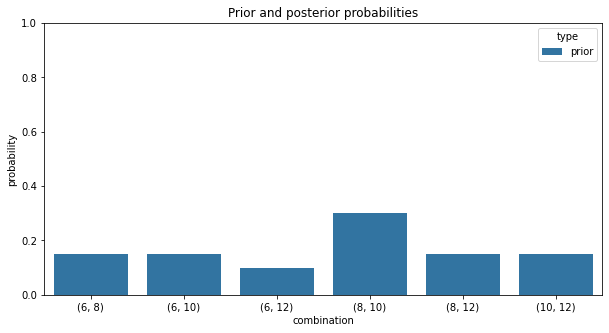

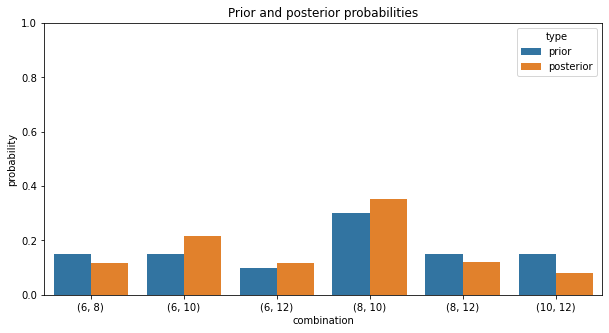

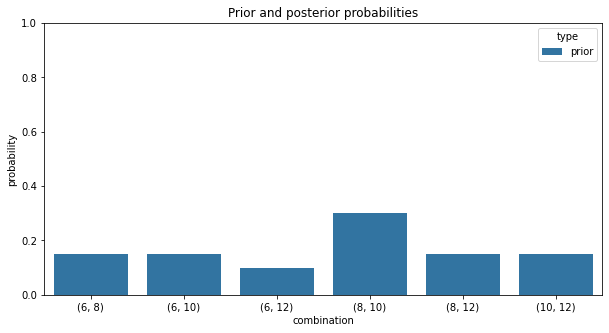

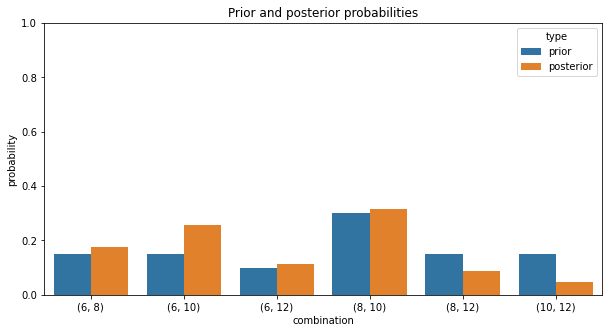

[0.17462329318216838, 0.2574925231946983, 0.11497830003764174, 0.31683650314972633, 0.08913063922839845, 0.04693874120736687]


In [53]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
initial_priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, initial_priors+posteriors), columns=['combination', 'type', 'probability'])
    plt.figure(figsize=(10,5))
    plt.ylim(0,1)
    plt.title('Prior and posterior probabilities')
    sns.barplot(x='combination', hue='type', y='probability', data=data)
    plt.show()
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, initial_priors+posteriors), columns=['combination', 'type', 'probability'])
    plt.figure(figsize=(10,5))
    plt.ylim(0,1)
    plt.title('Prior and posterior probabilities')
    sns.barplot(x='combination', hue='type', y='probability', data=data)
    plt.show()

posteriors = priors
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
print(posteriors)

In [54]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.7166168212979886


In [55]:
sum(posteriors)

1.0000000000000002

### Question 2.4
Analyze both test outcomes from subtasks 2. and 3. and compare them. Explain how to interpret the Bayes Factor and give reasons for potential discrepancies between different kinds of priors.

### Answer 2.4

Bayes Factor Intrepretation: 

Analyzing both the outcomes from Subtask 2 and 3 , shows us that both with the informative prior and without the informative prior, the Bayes Factor does not change significantly. It provides a very weak evidence towards the null hypothesis. 
On the other hand, when we try to increase the number of attacks, the Bayes Factor tends to provide a stronger evidence towards/against the null hypothesis. This suggests that with the provided small number of attacks, any informative prior will have a weak effect on the final outcome of the Bayes Factor and the test has to be continued to get any conclusive evidence with more number of attacks.

### Question 2.5
Given your test results, would you assume a different dice combination and why? Support your reasoning with a suitable diagram.

### Answer 2.5

Any dice combination will not have a strong effect on the final and it can be seen with the following result where we keep the prior same as the informative prior but increase the number of attacks from 5 to 15. 

...